[[-0.43015142  1.22439634 -1.86000439]
 [-1.06572783  0.55573519 -0.39164561]
 [-1.44743804  0.15415518  0.49021142]
 ..., 
 [-2.16914496 -0.60511998  2.1575557 ]
 [-0.87274778  0.75876077 -0.83748336]
 [-0.66577653  0.97650585 -1.31564468]]


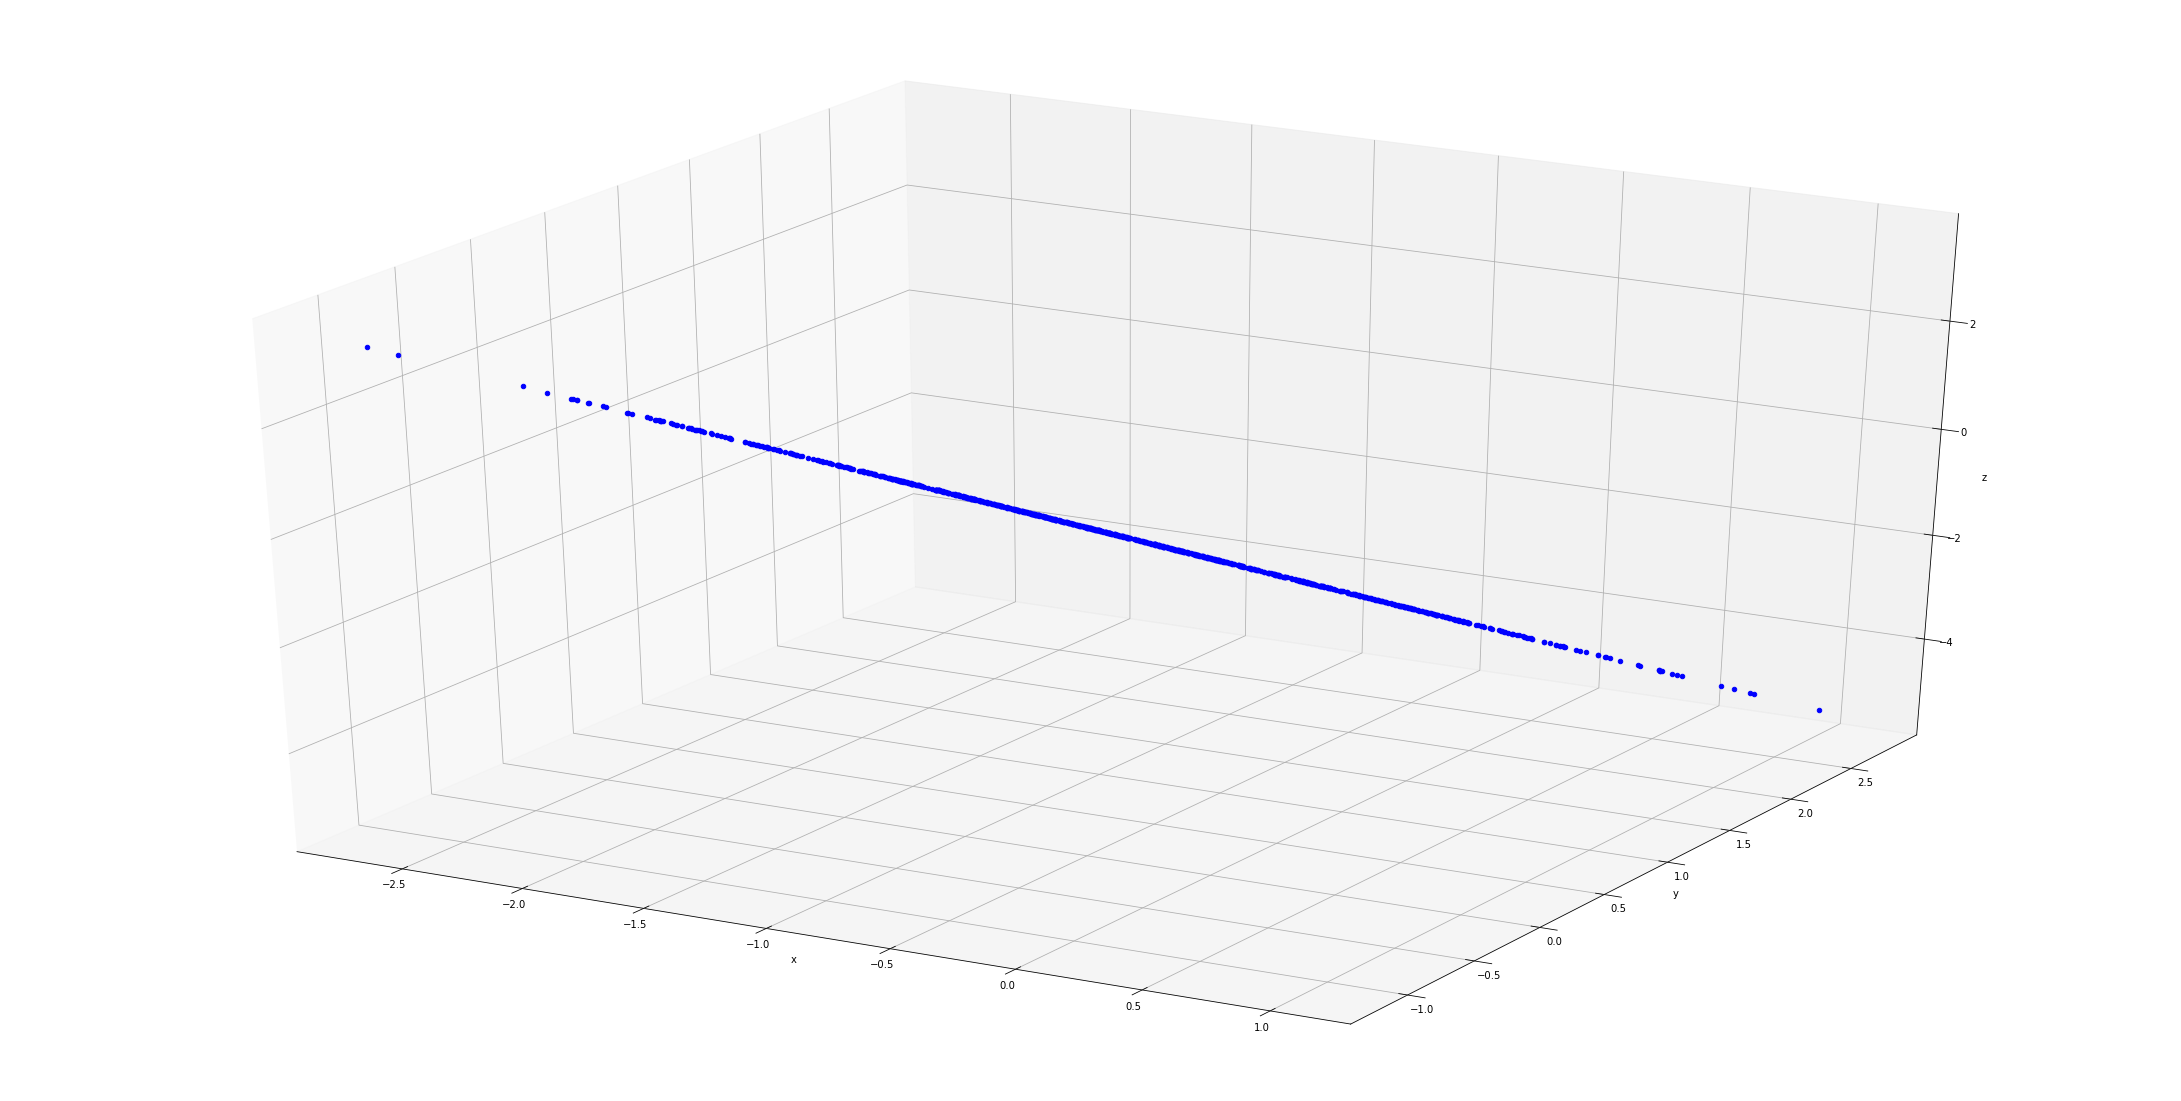

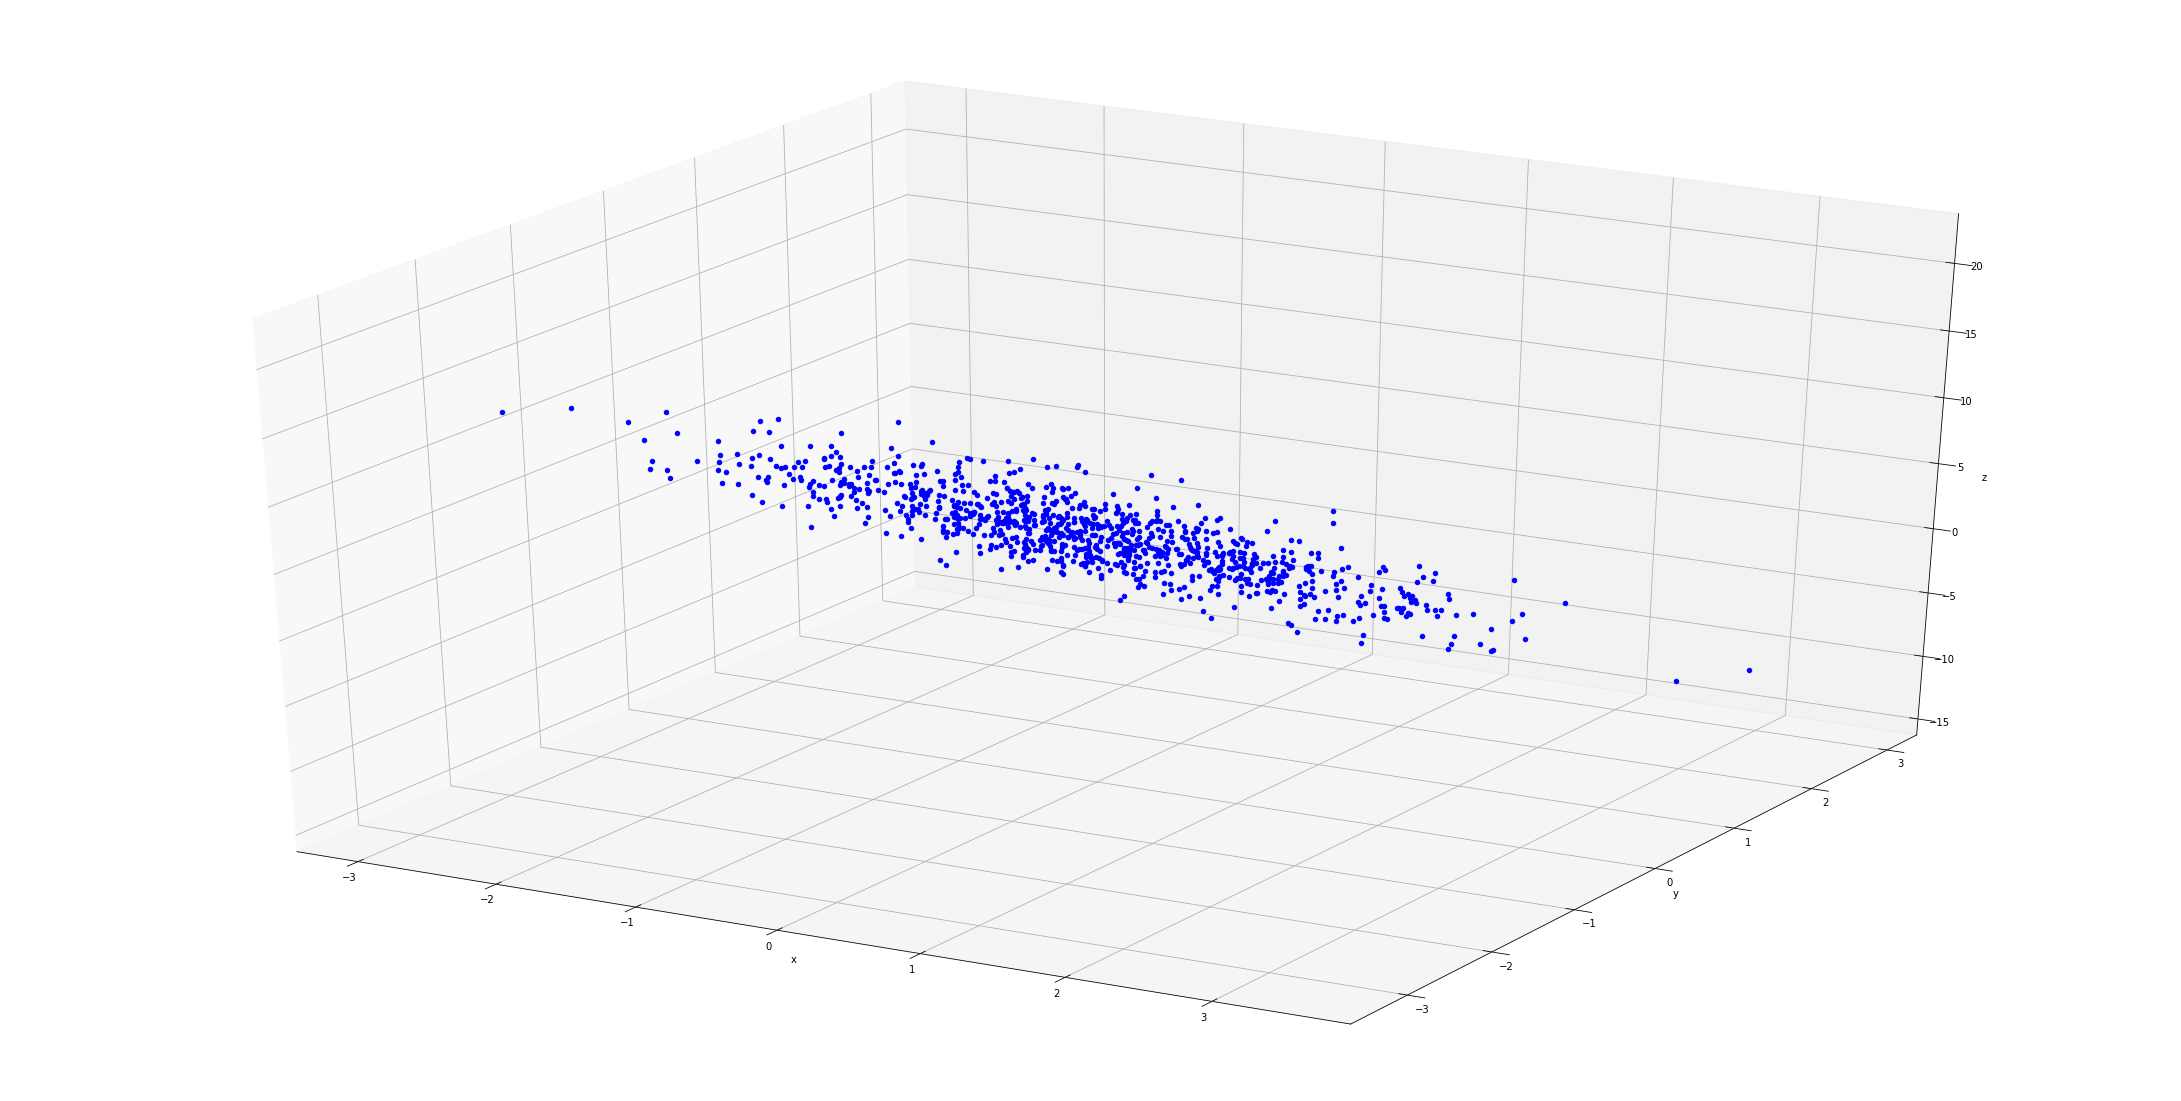

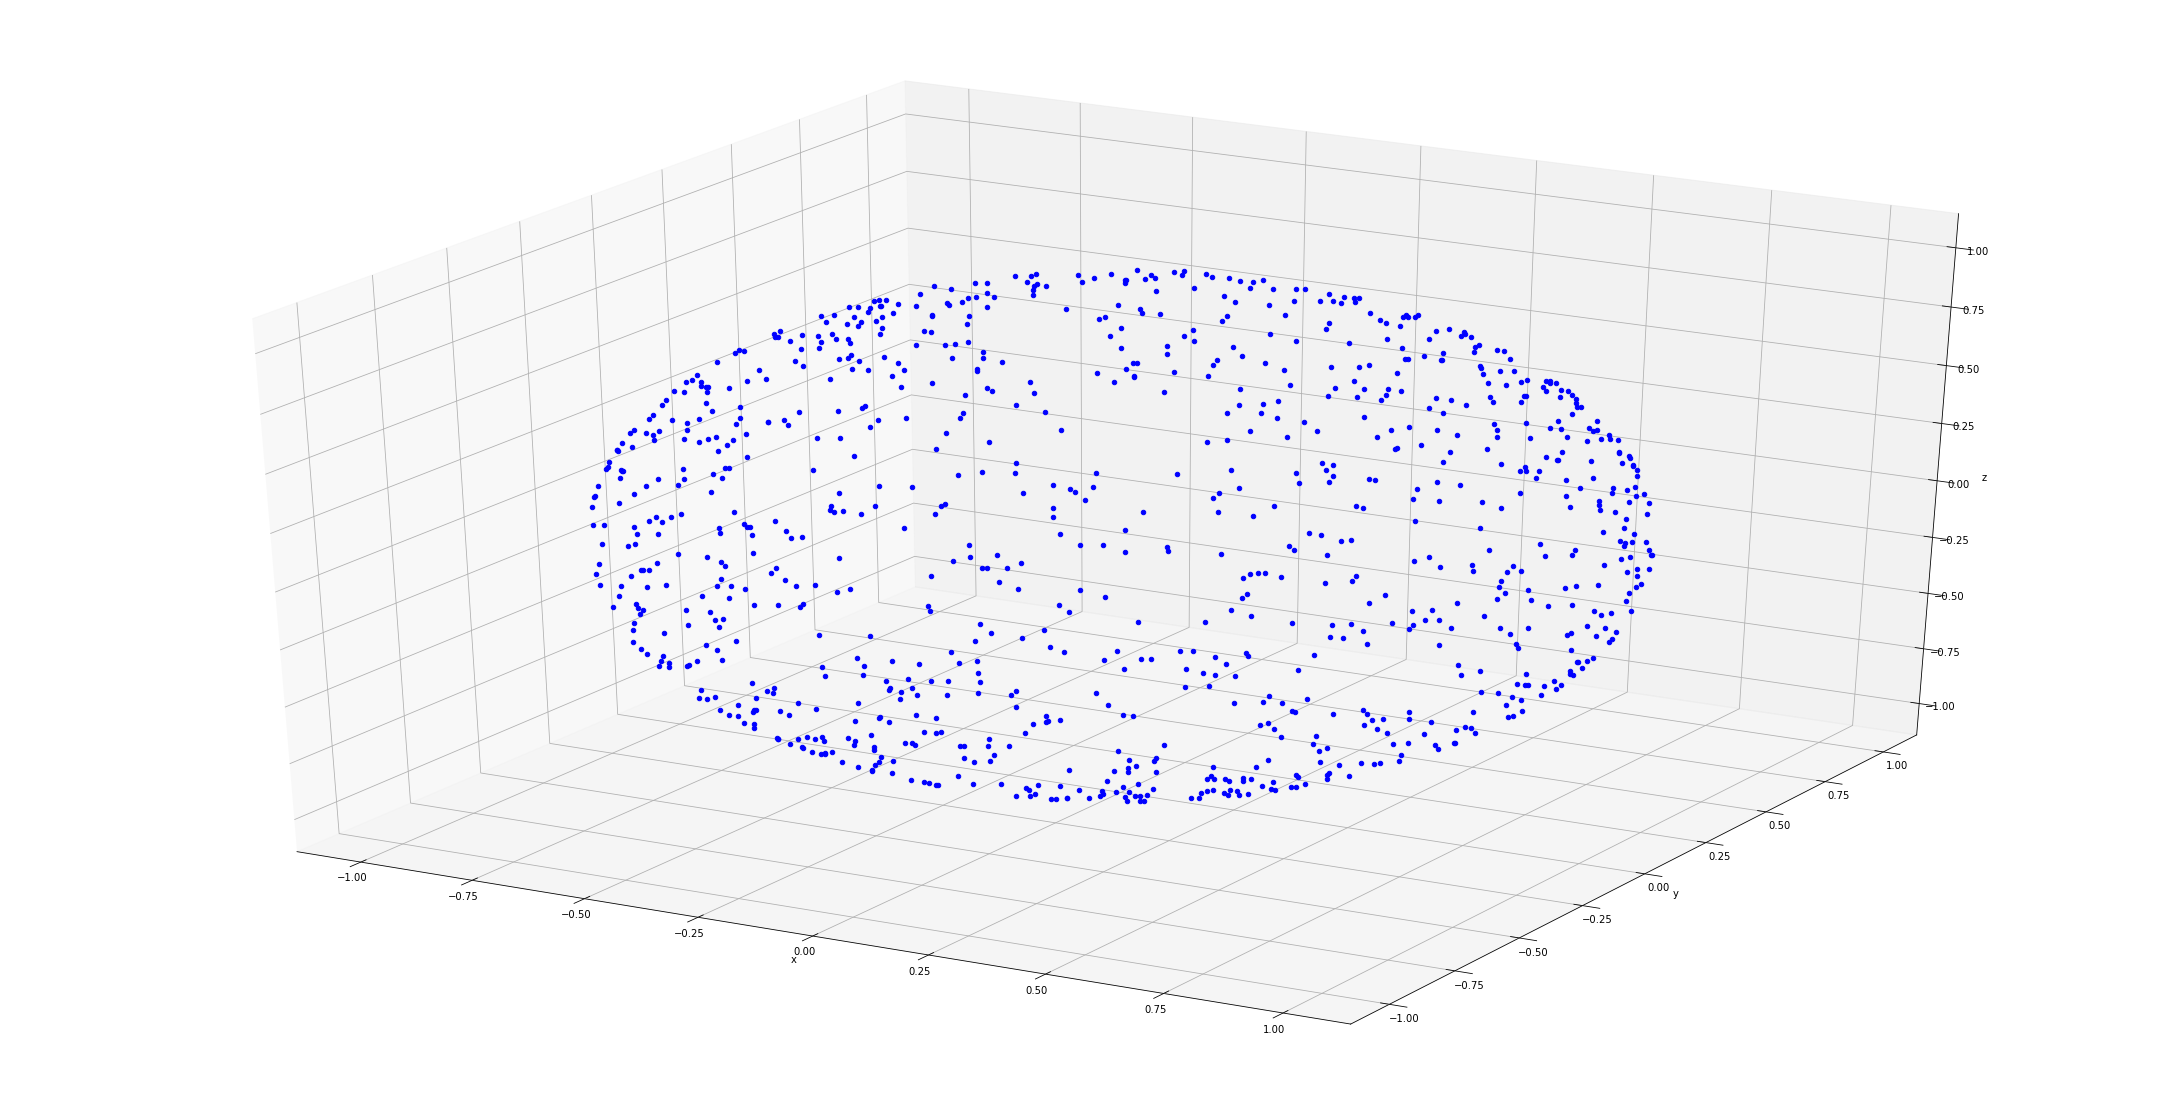

[NbConvertApp] Converting notebook Sampling_Points_GEO.ipynb to script
[NbConvertApp] Writing 3442 bytes to Sampling_Points_GEO.py
1258
2258


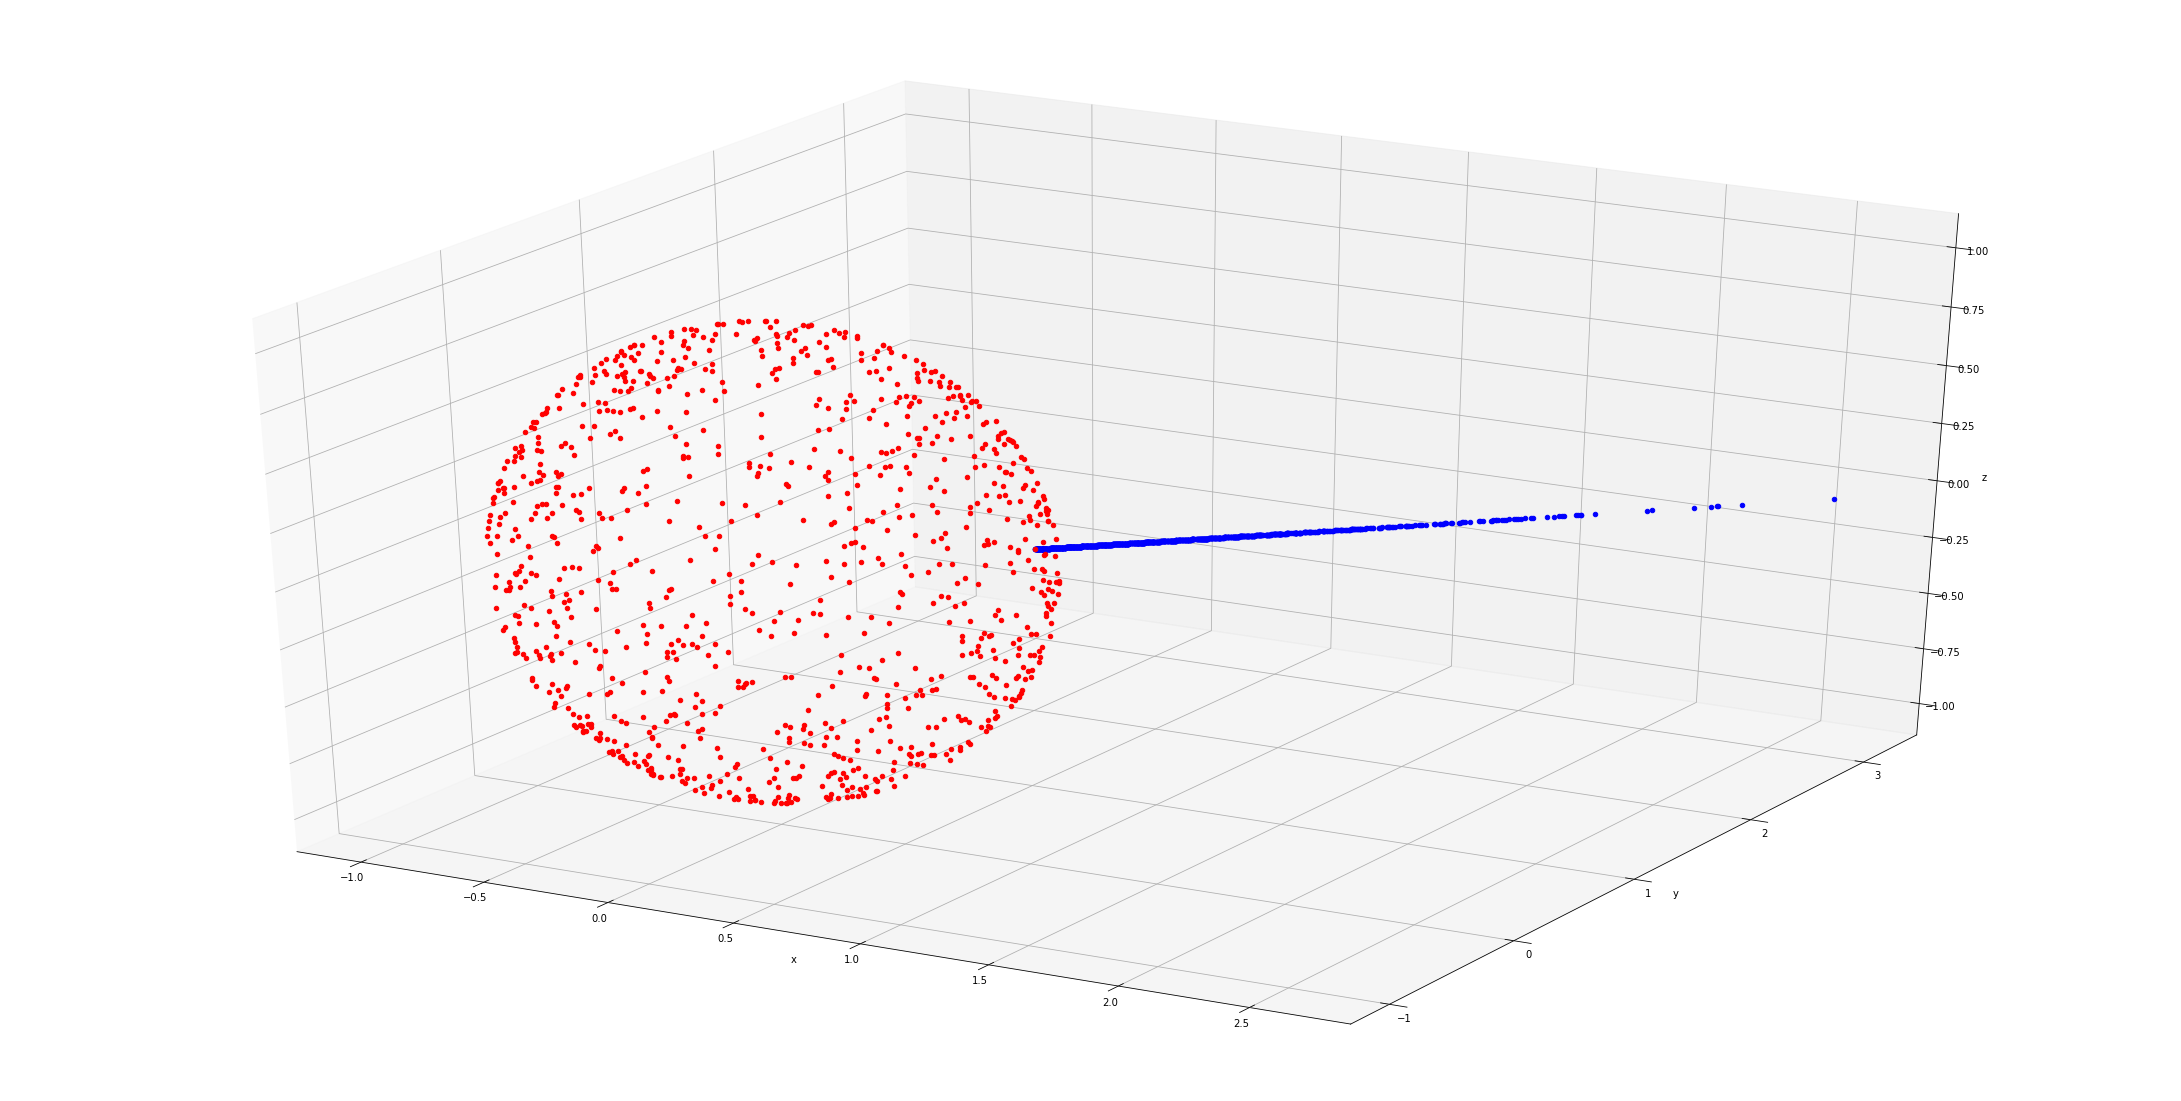

[NbConvertApp] Converting notebook Sampling_LineSphere_OS.ipynb to script
[NbConvertApp] Writing 3562 bytes to Sampling_LineSphere_OS.py


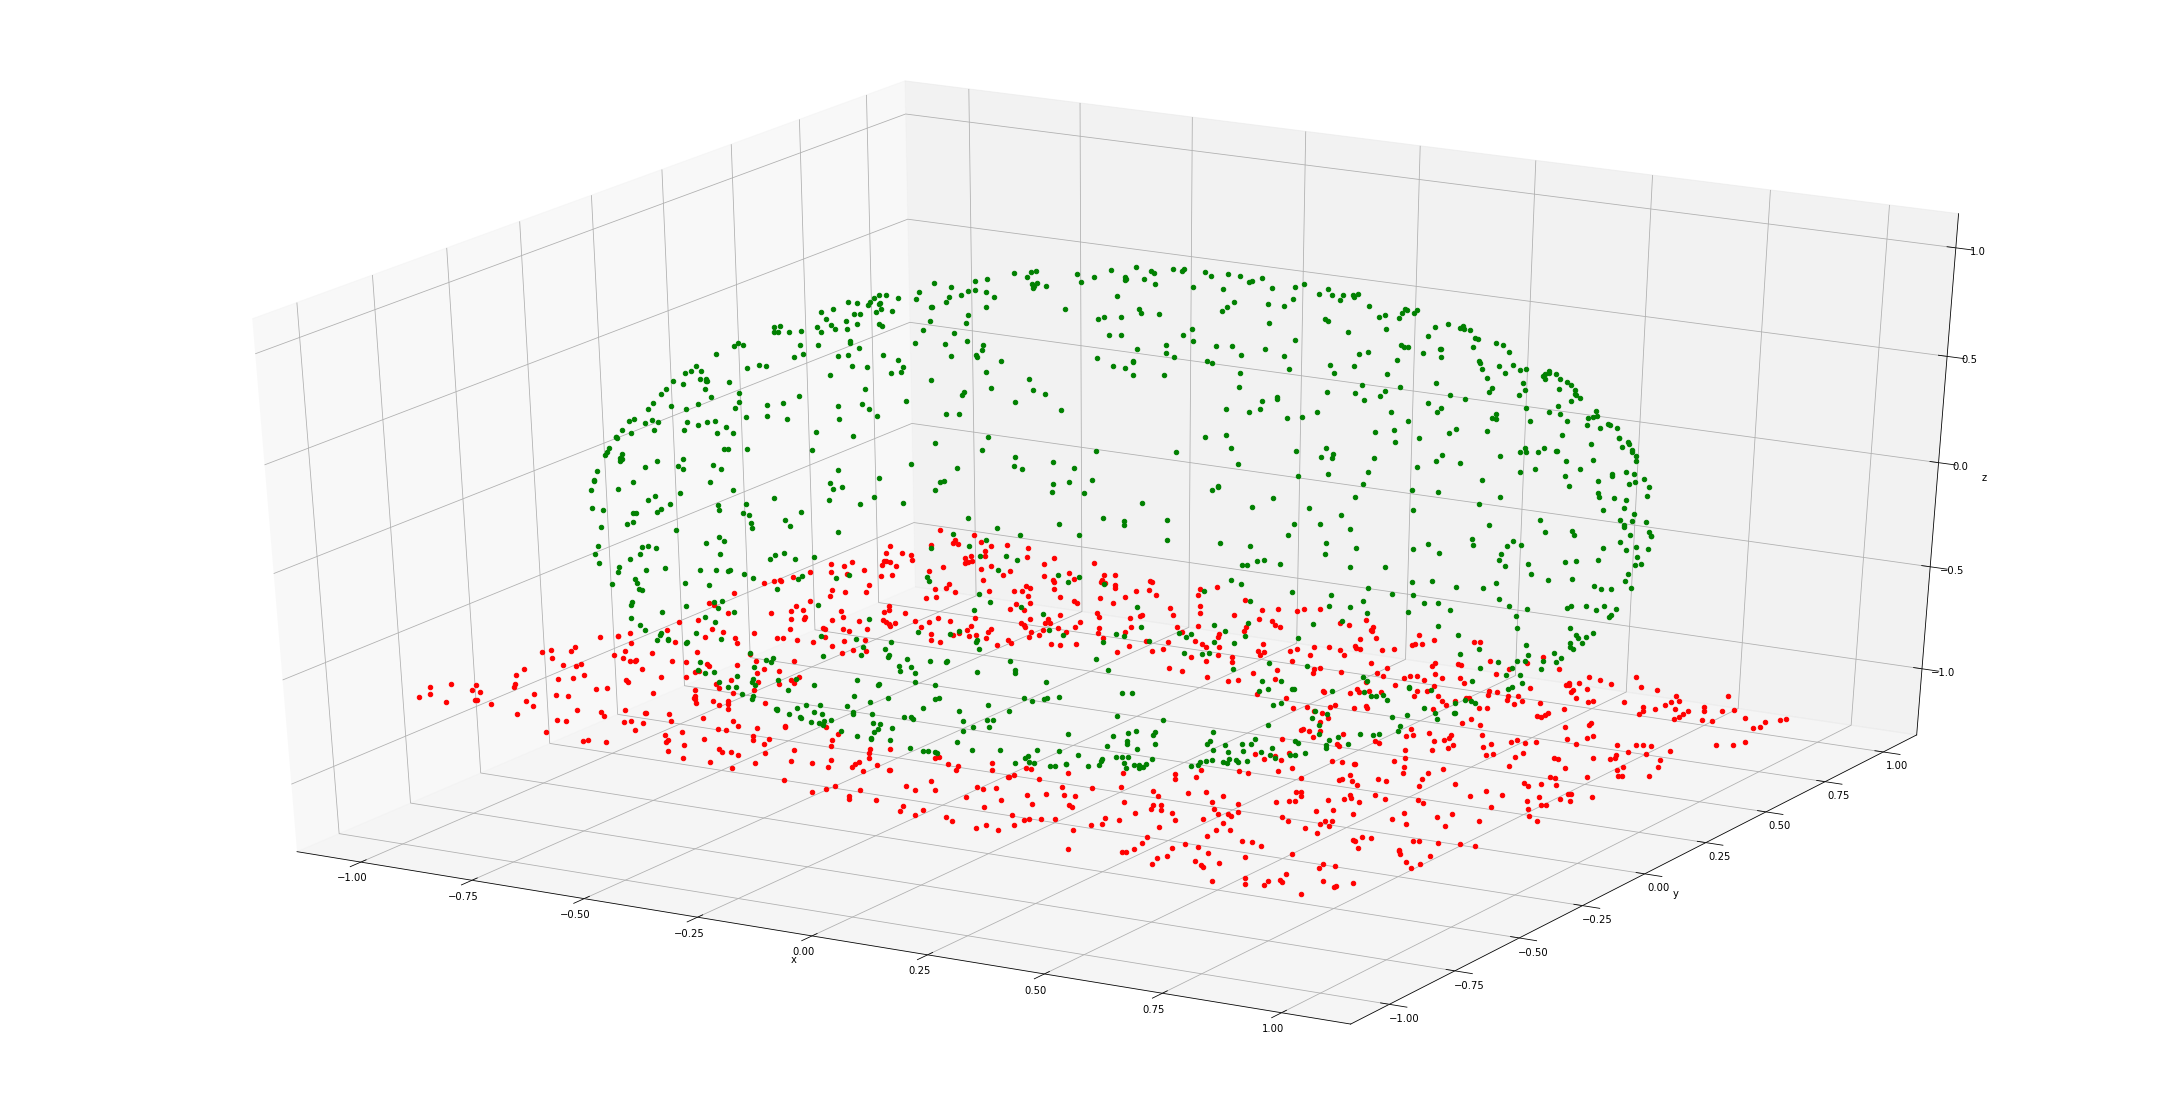

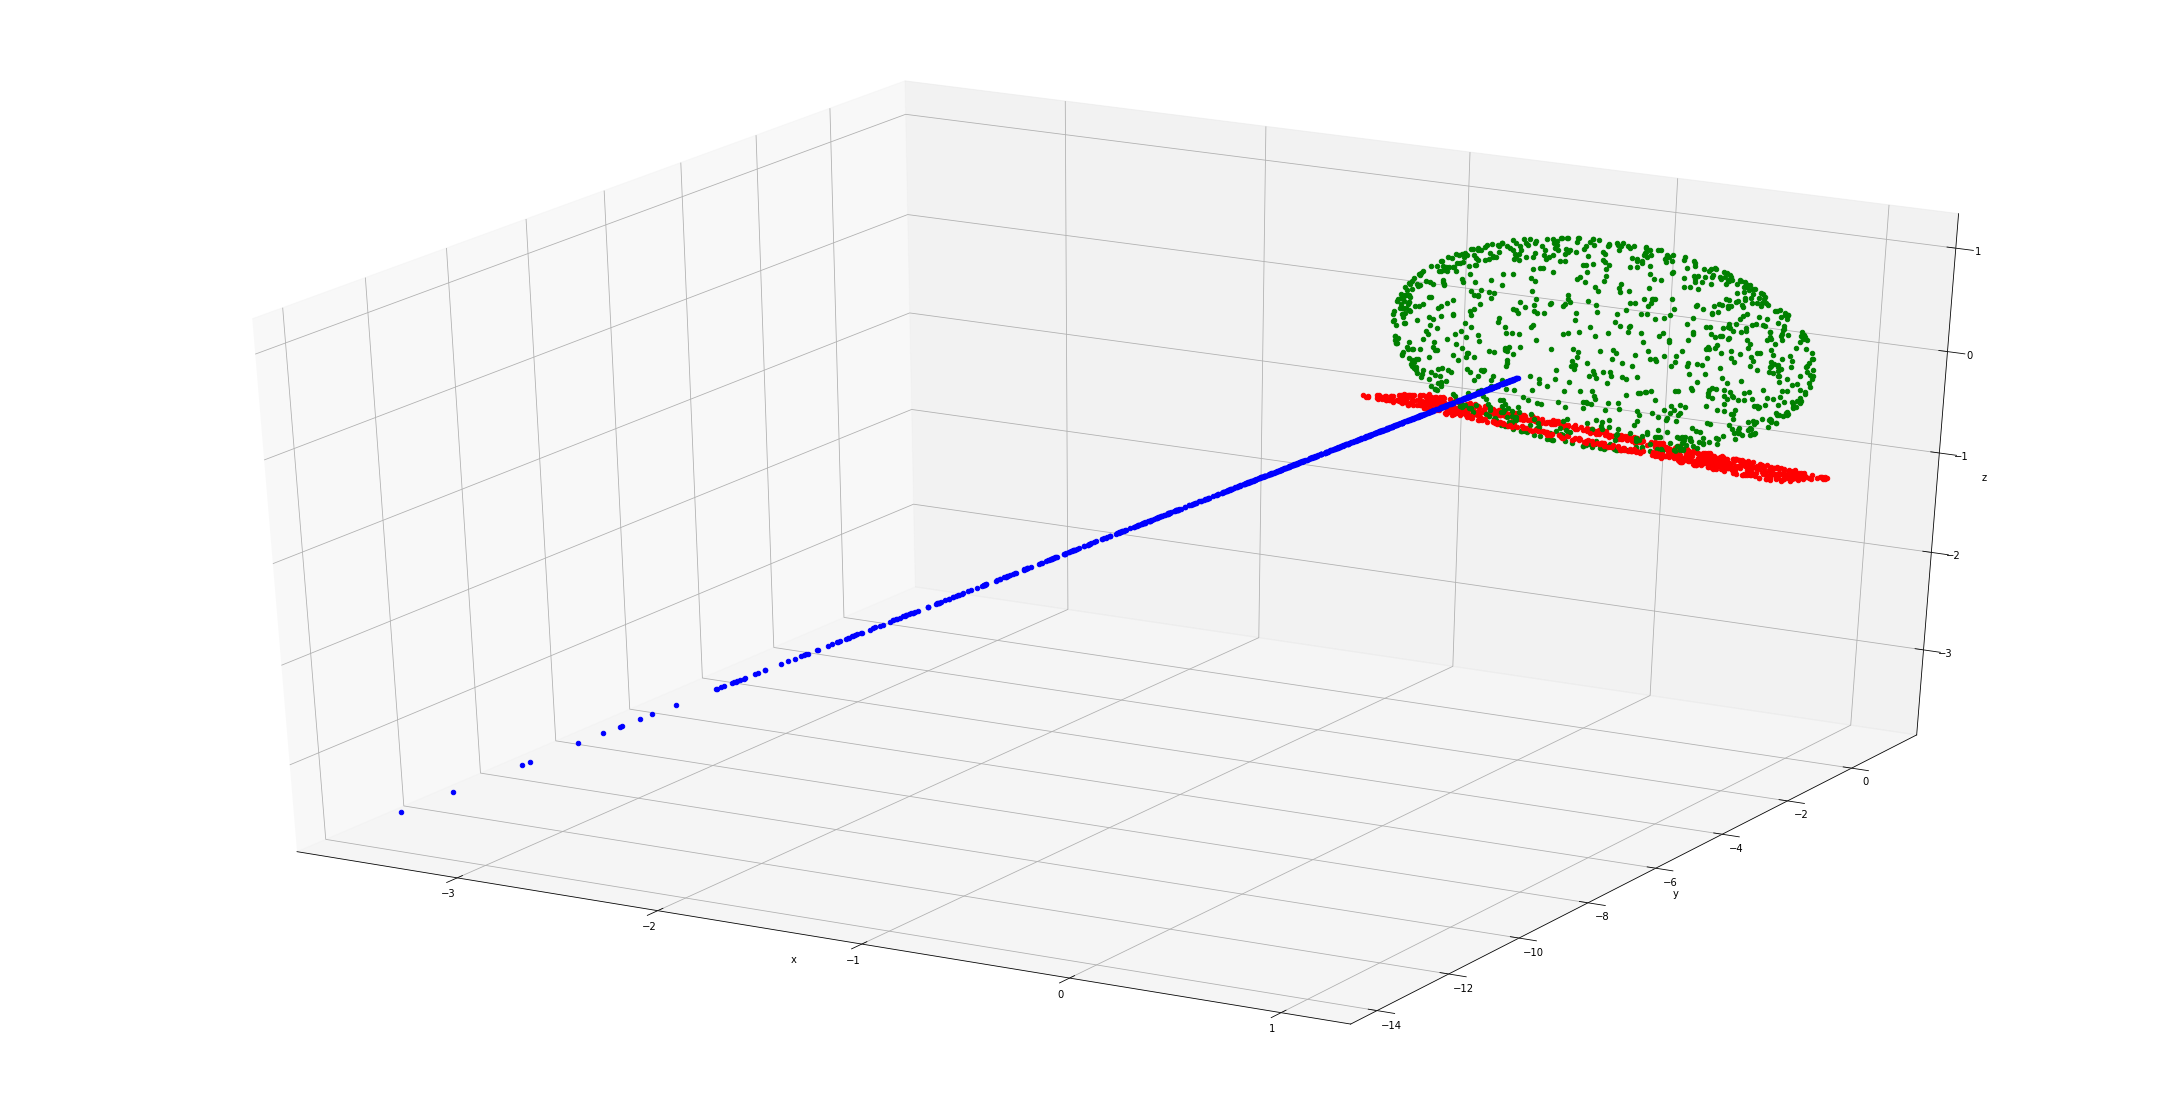

2646
[NbConvertApp] Converting notebook Sampling_PlaneSphere.ipynb to script
[NbConvertApp] Writing 5369 bytes to Sampling_PlaneSphere.py


In [1]:
import Sampling_Points_GEO as SPI
from Sampling_Points_GEO import *
import Sampling_LineSphere_OS as SLS
from Sampling_LineSphere_OS import *
import Sampling_PlaneSphere
from Sampling_PlaneSphere import *

In [5]:
LSP= Sampling_PlaneSphere.LSP

In [48]:
len(LSP)

2646

# Choosing Neighbourhoods point by point

In [320]:
neigh_coll=[]
r=[12,11,10,9,8.5,8.75,8,7,6]
for j in range(len(LSP)):
    neigh=[]
    for k in r:
        Sample_neigh=[]
        for i in range(len(LSP)):
            if (((LSP[i][0]-LSP[j][0])**2)+((LSP[i][1]-LSP[j][1])**2)+((LSP[i][2]-LSP[j][2])**2))<=(k**2):
                Sample_neigh.append(LSP[i])
        neigh.append(Sample_neigh)
    neigh_coll.append(neigh)
   

# Converting all list to numpy arrays

In [321]:
neigh_coll=np.asarray(neigh_coll, dtype=None, order=None)
for i in range(len(neigh_coll)):
    neigh_coll[i]=np.asarray(neigh_coll[i], dtype=None, order=None)
    for j in range(len(neigh_coll[i])):
        neigh_coll[i][j]=np.asarray(neigh_coll[i][j], dtype=None, order=None)
    
    

In [322]:
#test
neigh_coll[0][0]

array([[-1.03564576,  0.62399712,  0.41164864],
       [-0.63156271,  0.71047717, -0.07891446],
       [-0.51807615,  0.00821062,  0.50986553],
       ..., 
       [ 0.19406392,  0.75177239, -0.94583631],
       [-0.51576627,  0.70434654, -0.18858027],
       [ 0.10081633,  0.53421832, -0.63503465]])

# Centering

In [323]:
for i in range(len(neigh_coll)):
    for j in range(len(neigh_coll[i])):
        neigh_coll[i][j] = neigh_coll[i][j] - np.mean(neigh_coll[i][j], axis=0)
        
        
    

In [324]:
neigh_coll[0][0]

array([[-0.94756612,  0.96298719, -0.01542107],
       [-0.54348307,  1.04946724, -0.50598417],
       [-0.42999651,  0.34720069,  0.08279582],
       ..., 
       [ 0.28214356,  1.09076246, -1.37290602],
       [-0.42768662,  1.04333661, -0.61564998],
       [ 0.18889597,  0.87320839, -1.06210437]])

# Obtaing all the Singular Values

In [325]:
SVD_Array=[]
for i in range(len(neigh_coll)):
    for j in range(len(neigh_coll[i])):
        SVD_Array.append(np.linalg.svd(neigh_coll[i][j])[1])

In [326]:
len(SVD_Array)

18522

In [327]:
for i in range(len(SVD_Array)):
    if i%9==0:
        print(SVD_Array[i])

[  8.37356998e+01   3.72379344e+01   2.95099060e-14]
[  8.22395375e+01   3.72371833e+01   1.87150346e-14]
[  8.25780895e+01   3.72373683e+01   2.00478250e-14]
[  7.01240295e+01   3.72238565e+01   2.86425657e-14]
[  8.29206024e+01   3.72375508e+01   2.76828119e-14]
[  8.22395375e+01   3.72371833e+01   1.87150346e-14]
[  7.77839409e+01   3.72338462e+01   1.90698295e-14]
[  8.37356998e+01   3.72379344e+01   2.95099060e-14]
[  8.19318327e+01   3.72370030e+01   1.50736999e-14]
[  8.22395375e+01   3.72371833e+01   1.87150346e-14]
[  7.84538046e+01   3.72344375e+01   6.74938242e-15]
[  8.29206024e+01   3.72375508e+01   2.76828119e-14]
[  8.37356998e+01   3.72379344e+01   2.95099060e-14]
[  7.40371322e+01   3.72297752e+01   1.16038331e-14]
[  8.37356998e+01   3.72379344e+01   2.95099060e-14]
[  8.10715577e+01   3.72364613e+01   1.81664354e-14]
[  8.19318327e+01   3.72370030e+01   1.50736999e-14]
[  7.29625959e+01   3.72283441e+01   2.59496992e-14]
[  8.22395375e+01   3.72371833e+01   1.8715034

[  7.42176383e+01   3.72300047e+01   1.23271995e-14]
[  8.33100362e+01   3.72377407e+01   2.59783916e-14]
[  8.29206024e+01   3.72375508e+01   2.76828119e-14]
[  8.29206024e+01   3.72375508e+01   2.76828119e-14]
[  6.98032063e+01   3.72232789e+01   2.38331499e-14]
[  8.33100362e+01   3.72377407e+01   2.59783916e-14]
[  8.16387301e+01   3.72368236e+01   1.83542868e-14]
[  7.55237068e+01   3.72315600e+01   1.57314962e-14]
[  8.37356998e+01   3.72379344e+01   2.95099060e-14]
[  8.33100362e+01   3.72377407e+01   2.59783916e-14]
[  8.29206024e+01   3.72375508e+01   2.76828119e-14]
[  7.29625959e+01   3.72283441e+01   2.59496992e-14]
[  8.33100362e+01   3.72377407e+01   2.59783916e-14]
[  8.33100362e+01   3.72377407e+01   2.59783916e-14]
[  8.02766955e+01   3.72359132e+01   8.27924187e-15]
[  8.37356998e+01   3.72379344e+01   2.95099060e-14]
[  8.29206024e+01   3.72375508e+01   2.76828119e-14]
[  8.29206024e+01   3.72375508e+01   2.76828119e-14]
[  7.26091831e+01   3.72278467e+01   2.8254067

[  8.37356998e+01   3.72379344e+01   2.95099060e-14]
[  8.02766955e+01   3.72359132e+01   8.27924187e-15]
[  8.37356998e+01   3.72379344e+01   2.95099060e-14]
[  8.37356998e+01   3.72379344e+01   2.95099060e-14]
[  8.37356998e+01   3.72379344e+01   2.95099060e-14]
[  8.37356998e+01   3.72379344e+01   2.95099060e-14]
[  8.37356998e+01   3.72379344e+01   2.95099060e-14]
[  8.37356998e+01   3.72379344e+01   2.95099060e-14]
[  8.37356998e+01   3.72379344e+01   2.95099060e-14]
[  8.37356998e+01   3.72379344e+01   2.95099060e-14]
[  8.37356998e+01   3.72379344e+01   2.95099060e-14]
[  8.29206024e+01   3.72375508e+01   2.76828119e-14]
[  8.37356998e+01   3.72379344e+01   2.95099060e-14]
[  8.37356998e+01   3.72379344e+01   2.95099060e-14]
[  8.33100362e+01   3.72377407e+01   2.59783916e-14]
[  8.33100362e+01   3.72377407e+01   2.59783916e-14]
[  8.37356998e+01   3.72379344e+01   2.95099060e-14]
[  8.37356998e+01   3.72379344e+01   2.95099060e-14]
[  8.37356998e+01   3.72379344e+01   2.9509906

[  8.37356998e+01   3.72379344e+01   2.95099060e-14]
[  8.37356998e+01   3.72379344e+01   2.95099060e-14]
[  8.37356998e+01   3.72379344e+01   2.95099060e-14]
[  8.37356998e+01   3.72379344e+01   2.95099060e-14]
[  8.37356998e+01   3.72379344e+01   2.95099060e-14]
[  8.02766955e+01   3.72359132e+01   8.27924187e-15]
[  8.37356998e+01   3.72379344e+01   2.95099060e-14]
[  8.37356998e+01   3.72379344e+01   2.95099060e-14]
[  8.37356998e+01   3.72379344e+01   2.95099060e-14]
[  8.37356998e+01   3.72379344e+01   2.95099060e-14]
[  8.37356998e+01   3.72379344e+01   2.95099060e-14]
[  8.37356998e+01   3.72379344e+01   2.95099060e-14]
[  8.16387301e+01   3.72368236e+01   1.83542868e-14]
[  8.37356998e+01   3.72379344e+01   2.95099060e-14]
[  8.37356998e+01   3.72379344e+01   2.95099060e-14]
[  8.37356998e+01   3.72379344e+01   2.95099060e-14]
[  8.37356998e+01   3.72379344e+01   2.95099060e-14]
[  8.04796192e+01   3.61457347e+01   1.38236302e-14]
[  8.37356998e+01   3.72379344e+01   2.9509906

In [328]:
LSP=LSP_C

In [329]:
LSP_C=np.asarray(LSP_C, dtype=None, order=None)
for i in range(len(LSP_C)):
    LSP_C[i]=np.asarray(LSP_C[i], dtype=None, order=None)
    for j in range(len(LSP_C[i])):
        LSP_C[i][j]=np.asarray(LSP_C[i][j], dtype=None, order=None)

In [330]:
for i in range(len(LSP_C)):
        LSP_C[i]=LSP_C[i]-np.mean(LSP_C[i],axis=0)

In [331]:
LSP_C.tolist()

[[-1.0356457581534786, 0.6239971187570623, 0.4116486393964163],
 [-0.631562706734726, 0.7104771696473557, -0.07891446291262973],
 [-0.518076147772892, 0.008210618904429808, 0.5098655288684623],
 [-0.9704778210138871, 0.7133056380877726, 0.2571721829261146],
 [-1.8250532779987676, 0.5574935244452879, 1.2675597535534797],
 [-1.482112264159786, 0.11688841243074462, 1.3652238517290414],
 [-1.6597782564476042, 0.24089746091239406, 1.4188807955352103],
 [-0.6714528172537867, 0.6482192070708985, 0.02323361018288818],
 [-0.9329919278574447, 0.5159567443941191, 0.41703518346332563],
 [-0.8428077855784617, -0.3502110378360248, 1.1930188234144865],
 [-0.9610912722168432, 0.7593915906560494, 0.20169968156079376],
 [-1.2044987458828846, -0.27200818648762176, 1.4765069323705065],
 [-0.3566209021761258, -0.36747814469453627, 0.7240990468706621],
 [-0.6607875601751323, 0.5255120823553198, 0.1352754778198125],
 [-0.47392102201294917, 0.5322999192226437, -0.05837889720969459],
 [-0.30365609955515716, -0

In [332]:
SDV_Array_T=np.linalg.svd(LSP_C.tolist())

In [333]:
LSP_CL=LSP_C.tolist()

In [334]:
#LSP_CL.shape()

In [335]:
LSP_CL

[[-1.0356457581534786, 0.6239971187570623, 0.4116486393964163],
 [-0.631562706734726, 0.7104771696473557, -0.07891446291262973],
 [-0.518076147772892, 0.008210618904429808, 0.5098655288684623],
 [-0.9704778210138871, 0.7133056380877726, 0.2571721829261146],
 [-1.8250532779987676, 0.5574935244452879, 1.2675597535534797],
 [-1.482112264159786, 0.11688841243074462, 1.3652238517290414],
 [-1.6597782564476042, 0.24089746091239406, 1.4188807955352103],
 [-0.6714528172537867, 0.6482192070708985, 0.02323361018288818],
 [-0.9329919278574447, 0.5159567443941191, 0.41703518346332563],
 [-0.8428077855784617, -0.3502110378360248, 1.1930188234144865],
 [-0.9610912722168432, 0.7593915906560494, 0.20169968156079376],
 [-1.2044987458828846, -0.27200818648762176, 1.4765069323705065],
 [-0.3566209021761258, -0.36747814469453627, 0.7240990468706621],
 [-0.6607875601751323, 0.5255120823553198, 0.1352754778198125],
 [-0.47392102201294917, 0.5322999192226437, -0.05837889720969459],
 [-0.30365609955515716, -0

In [336]:
SVDArray_T=np.linalg.svd(LSP_CL)

In [337]:
Total_Variance=SVDArray_T[1][0]**2+SVDArray_T[1][1]**2+SVDArray_T[1][2]**2

In [338]:
SVD_Array_V=[]

In [339]:
for i in range(len(SVD_Array)):
    if (len(SVD_Array[i])==3):
        Variance=SVD_Array[i][0]**2+SVD_Array[i][1]**2+SVD_Array[i][2]**2
    elif (len(SVD_Array[i])==2):
        Variance=SVD_Array[i][0]**2+SVD_Array[i][1]**2
    else:
        Variance=SVD_Array[i][0]**2    
             
             
        
    SVD_Array_V.append(Variance/Total_Variance)     

In [341]:
SVD_Array_V[0:6]

[0.91231448462558906,
 0.89755489900330887,
 0.88533265358756141,
 0.88533265358756141,
 0.86460619966335905,
 0.79332338056396734]